<a href="https://colab.research.google.com/github/mayankb-21/machine-learning-lab/blob/main/ml_lab_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Sample dataset (XOR problem again, but with a different structure for demonstration)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Network parameters
input_layer_neurons = X.shape[1]
hidden_layer_neurons = 2
output_neurons = 1
lr = 0.1 # Learning rate

# Initialize weights randomly
W1 = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
W2 = np.random.uniform(size=(hidden_layer_neurons, output_neurons))

# Training loop
epochs = 10000
for epoch in range(epochs):

    # Forward pass
    hidden_layer_input = np.dot(X, W1)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, W2)
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    # Calculate error
    error = y - predicted_output

    # Calculate output layer gradient
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    # Calculate hidden layer gradient
    error_hidden_layer = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights
    W2 += hidden_layer_output.T.dot(d_predicted_output) * lr
    W1 += X.T.dot(d_hidden_layer) * lr

    # Print weights periodically to observe changes
    if epoch % 1000 == 0:
        print(f"--- Epoch {epoch} ---")
        print("W1:\n", W1)
        print("W2:\n", W2)
        print("Error:", np.mean(np.abs(error))) # Print mean absolute error

print("\n--- Training Finished ---")
print("Final predicted output:\n", predicted_output)

--- Epoch 0 ---
W1:
 [[0.18565263 0.34477346]
 [0.39609528 0.53791216]]
W2:
 [[0.41111757]
 [0.67672611]]
Error: 0.49941102180241764
--- Epoch 1000 ---
W1:
 [[0.15179836 0.37110671]
 [0.37035407 0.54390134]]
W2:
 [[-0.1581634 ]
 [ 0.15454813]]
Error: 0.49991689517663795
--- Epoch 2000 ---
W1:
 [[0.12531205 0.46159304]
 [0.35914908 0.61436211]]
W2:
 [[-0.22765896]
 [ 0.21458869]]
Error: 0.49979633977683213
--- Epoch 3000 ---
W1:
 [[0.10013552 0.63419798]
 [0.35460343 0.75989165]]
W2:
 [[-0.35827486]
 [ 0.32245193]]
Error: 0.4993469768513096
--- Epoch 4000 ---
W1:
 [[0.10369489 1.04483141]
 [0.38517711 1.13648064]]
W2:
 [[-0.67532179]
 [ 0.57235722]]
Error: 0.49653977512361536
--- Epoch 5000 ---
W1:
 [[0.26299762 2.01542169]
 [0.55835778 2.0913607 ]]
W2:
 [[-1.62527161]
 [ 1.30533249]]
Error: 0.47726563156653723
--- Epoch 6000 ---
W1:
 [[0.51947944 3.12551283]
 [0.65040895 3.21524913]]
W2:
 [[-3.36235574]
 [ 2.62146473]]
Error: 0.43621445603247444
--- Epoch 7000 ---
W1:
 [[0.64934384 3.9

# Task
Implement a simple multilayer perceptron (MLP) in Python using NumPy, train it on a sample dataset, visualize the weight changes during backpropagation, and visualize the training error and the decision boundary.

## Modify the training loop

### Subtask:
Collect the error at each epoch.


**Reasoning**:
Initialize an empty list to store errors and modify the training loop to append the error at each epoch while removing periodic printing.



In [ ]:
# Initialize a list to store the error at each epoch
errors = []

# Training loop
epochs = 10000
for epoch in range(epochs):

    # Forward pass
    hidden_layer_input = np.dot(X, W1)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, W2)
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    # Calculate error
    error = y - predicted_output

    # Append the mean absolute error to the errors list
    errors.append(np.mean(np.abs(error)))

    # Calculate output layer gradient
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    # Calculate hidden layer gradient
    error_hidden_layer = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights
    W2 += hidden_layer_output.T.dot(d_predicted_output) * lr
    W1 += X.T.dot(d_hidden_layer) * lr

print("\n--- Training Finished ---")
print("Final predicted output:\n", predicted_output)


--- Training Finished ---
Final predicted output:
 [[0.12390973]
 [0.81306986]
 [0.81307124]
 [0.24589967]]


## Visualize the error

### Subtask:
Plot the error over the epochs to see how it decreases during training.


**Reasoning**:
Plot the training error over the epochs as requested in the instructions.



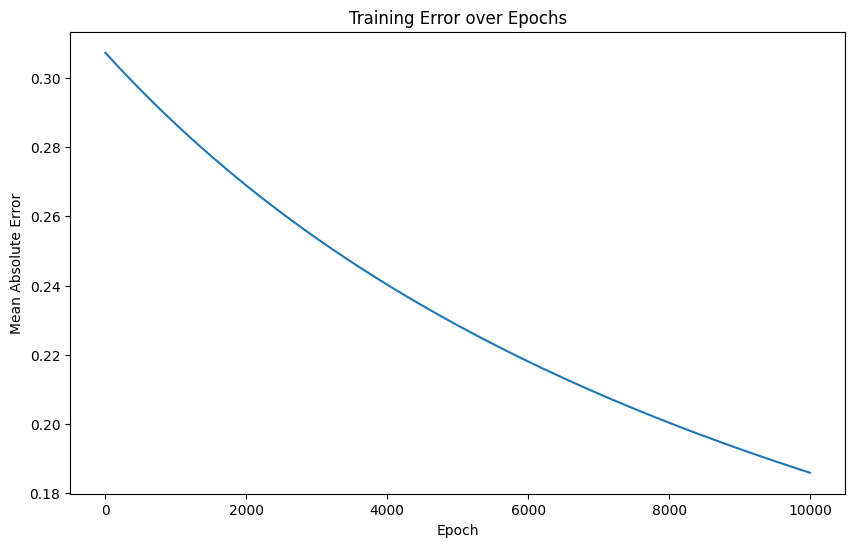

In [ ]:
import matplotlib.pyplot as plt

# Plot the error over the epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), errors)
plt.title("Training Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.show()

## Visualize the decision boundary

### Subtask:
Create a meshgrid of points and predict the output for each point using the trained network. Then, plot the predicted output as a contour plot to visualize the decision boundary.


**Reasoning**:
Create a meshgrid, predict the output for each point, and then plot the contour and the original data points to visualize the decision boundary.



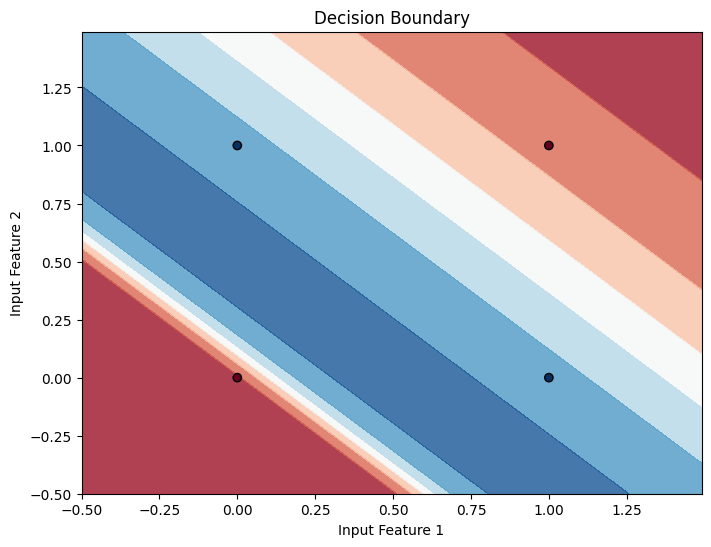

In [ ]:
# Create a meshgrid of points
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the meshgrid points
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the output for each point in the meshgrid
hidden_layer_input_grid = np.dot(grid_points, W1)
hidden_layer_output_grid = sigmoid(hidden_layer_input_grid)
output_layer_input_grid = np.dot(hidden_layer_output_grid, W2)
predicted_output_grid = sigmoid(output_layer_input_grid)

# Reshape the predicted outputs
predicted_output_grid = predicted_output_grid.reshape(xx.shape)

# Create a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predicted_output_grid, cmap=plt.cm.RdBu, alpha=0.8)

# Add the original training data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.RdBu, edgecolors='k')

# Add title and labels
plt.title("Decision Boundary")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The training error (Mean Absolute Error) decreased over epochs, indicating that the neural network was learning from the data.
*   The trained multilayer perceptron created a decision boundary that appears to separate the training data points based on their class labels.

### Insights or Next Steps

*   The visualization confirms that the simple MLP architecture and training process were effective in learning a decision boundary for the given dataset.
*   One could explore different learning rates or network architectures to see if they lead to faster convergence or a different decision boundary.
